In [2]:
import pandas as pd
import numpy as np

In [3]:
dta=pd.read_csv("data/UniversalBank_student.csv")
dta.head()

,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,0,35,8,45,91330,4,1.0,2,0,0,0,0,1


Create dummy variables for education and remove unnecessary columns

In [4]:
dummy_educ=(
    pd
    .get_dummies(dta.Education)
    .rename({1:"UnderGrad",2:"Grad",3:"Advanced"},axis=1)
    .drop(["UnderGrad"],axis=1)
)
dummy_educ.head()


,Grad,Advanced
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [5]:
dta2=(
    pd
    .concat([dta,dummy_educ],axis=1)
    .drop(["Education","ZIP Code"],axis=1)
)
dta2.head()

,Personal Loan,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Grad,Advanced
0,0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,0,45,19,34,3,1.5,0,1,0,0,0,0,0
2,0,39,15,11,1,1.0,0,0,0,0,0,0,0
3,0,35,9,100,1,2.7,0,0,0,0,0,1,0
4,0,35,8,45,4,1.0,0,0,0,0,1,1,0


To partition the data into 60\% training and 40\% test sets, we use the scikit-learn **train_test_split** function. For the first argument (by position), we need to specify all of the columns in dta2 besides the outcome, i.e., Personal Loan; to accomplish this, we use Pandas **drop** function with *axis* set to `1` (i.e., columns). For the second argument, we specify the outcome, i.e., `dta2["Personal Loan"]`. Finally, for *test_size*, we enter `0.40`, which reflects our 40\% test set, and for *random_state*, we specify a particular integer chosen at random (e.g., `321`) to keep our results consistent and reproducible. Enter:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dta2.drop('Personal Loan', axis = 1), 
                                                    dta2["Personal Loan"], 
                                                    test_size = 0.40, 
                                                    random_state = 321)


Running the command above splits our data into four separate variables: X_train and y_train, which are the predictors and outcome variable, respectively, for the training set, and X_test and y_test, which are the predictors and outcome variable for the test set, respectively. To check the sizes of the data, we can use the **len** function:

In [7]:
len(X_train)

3000

In [8]:
len(X_test)

2000

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainScaler = scaler.fit(X_train)

In [10]:
X_train_scaled = trainScaler.transform(X_train)
X_test_scaled = trainScaler.transform(X_test)



In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

**e.** Because we are interested in evaluating a variety of different possible values of $k$ in our model, we create a dictionary of values to explore using the label *n_neighbors* and a **range** of values between 1 and 10 (with the latter value being set to 10 + 1 since the end of **range** is exclusive). Enter:

In [12]:
paramGrid = {'n_neighbors': range(1, 10 + 1)}

**f.** Now we are ready to fit our models and evaluate the different $k$ values. To do this, we will use $k$-fold cross-validation, as noted earlier (where the $k$ in $k$-fold vs. the $k$ in KNN are not to be confused). Before we get started, we need to set up the procedure using the scikit-learn **GridSearchCV** function and store it in a variable with the label search. Within the function, the first two arguments are used to specify our model from part d and our paramGrid from part e above; in addition, we use *cv* to set the number of folds to 10 and choose `'accuracy'` as our *scoring* metric to have results comparable to what is shown in the text (alternative scoring metrics may also be evaluated, which can be useful in various cases such as high class imbalance). Enter:

In [13]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, 
                      paramGrid, 
                      cv = 10, 
                      scoring = 'accuracy')

To actually run the modeling process, we use the **fit** method on our search variable and store the result in searchFit. Enter:

In [14]:
searchFit = search.fit(X_train_scaled, y_train)

**g.** To view the results of our search, including accuracy, we can use the **cv_results_** property of searchFit. To make the output more presentable, we wrap the result as a Pandas DataFrame (table). Enter:

In [15]:
pd.DataFrame(searchFit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004356,0.004684,0.013094,4.712851e-03,1,{'n_neighbors': 1},0.953333,0.976667,0.953333,0.953333,0.960000,0.943333,0.970000,0.956667,0.933333,0.966667,0.956667,0.012019,2
1,0.007399,0.006096,0.011937,6.007594e-03,2,{'n_neighbors': 2},0.956667,0.966667,0.953333,0.946667,0.950000,0.946667,0.963333,0.946667,0.936667,0.943333,0.951000,0.008699,5
2,0.005285,0.006991,0.013181,5.117097e-03,3,{'n_neighbors': 3},0.956667,0.970000,0.953333,0.946667,0.956667,0.953333,0.970000,0.950000,0.950000,0.966667,0.957333,0.008138,1
3,0.006214,0.005420,0.015858,2.138095e-03,4,{'n_neighbors': 4},0.953333,0.956667,0.946667,0.940000,0.953333,0.950000,0.970000,0.943333,0.933333,0.946667,0.949333,0.009522,8
4,0.008020,0.007116,0.014526,5.007176e-03,5,{'n_neighbors': 5},0.960000,0.960000,0.953333,0.943333,0.963333,0.950000,0.980000,0.956667,0.933333,0.956667,0.955667,0.011743,3
5,0.006481,0.006492,0.015352,1.524516e-03,6,{'n_neighbors': 6},0.956667,0.960000,0.943333,0.940000,0.953333,0.946667,0.976667,0.950000,0.933333,0.946667,0.950667,0.011431,7
6,0.004687,0.007159,0.015623,2.910270e-07,7,{'n_neighbors': 7},0.950000,0.963333,0.953333,0.943333,0.963333,0.946667,0.976667,0.956667,0.933333,0.950000,0.953667,0.011494,4
7,0.006771,0.008415,0.015390,1.191147e-03,8,{'n_neighbors': 8},0.950000,0.956667,0.950000,0.936667,0.960000,0.943333,0.966667,0.946667,0.933333,0.940000,0.948333,0.010028,9
8,0.005979,0.005813,0.018957,5.864149e-03,9,{'n_neighbors': 9},0.950000,0.956667,0.953333,0.936667,0.970000,0.943333,0.966667,0.950000,0.933333,0.950000,0.951000,0.011060,5
9,0.004321,0.006108,0.018644,6.618878e-03,10,{'n_neighbors': 10},0.946667,0.956667,0.946667,0.933333,0.956667,0.943333,0.956667,0.940000,0.930000,0.943333,0.945333,0.008969,10


Within this large table, we can see the results for different $k$ values within the KNN across the rows (i.e., see the column param_n_neighbors). On the far right, we can see the average test score (mean_test_score) as well as the ranking (rank_test_score), which shows that a $k$ setting of 3 performed best. The other columns in the table of output provide additional statistics such as the score on each split of the 10-fold cross-validation procedure. To make the results we are focused on more clear, we can use Pandas to sort the output based on rank_test_score with **sort_values** and also view only the relevant columns. Enter:

In [16]:
pd.DataFrame(searchFit.cv_results_).sort_values('rank_test_score')[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
2,3,0.957333,1
0,1,0.956667,2
4,5,0.955667,3
6,7,0.953667,4
1,2,0.951000,5
8,9,0.951000,5
5,6,0.950667,7
3,4,0.949333,8
7,8,0.948333,9
9,10,0.945333,10


Alternatively, to view the best model parameters, we can also use the **best_estimator_** attribute: 

In [17]:
searchFit.best_estimator_

KNeighborsClassifier(n_neighbors=3)

We can now apply our trained KNN model to our scaled test data from part c (X_test_scaled) using the **predict** method of fitted model search (searchFit). We store our predictions in the variable testPredictions. Enter:

In [18]:
testPredictions = searchFit.predict(X_test_scaled)
testPredictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

To create a simple confusion matrix, we can use the scikit-learn **confusion_matrix** function to compare our test predictions (testPredictions) to the actual test outcomes (y_test). Enter:

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, testPredictions)

array([[1805,    8],
       [  81,  106]], dtype=int64)

Alternatively, we can also visualize the result using scikit-learn's **ConfusionMatrixDisplay.from_estimator** (formerly **plot_confusion_matrix**), which takes our best model (searchFit), scaled test predictors (X_test_scaled), and outcomes (y_test) as the first three arguments. We also import matplotlib and use `plt.cm.Blues` to adjust the *cmap* argument of **ConfusionMatrixDisplay.from_estimator** to make the visual more presentable. Enter:

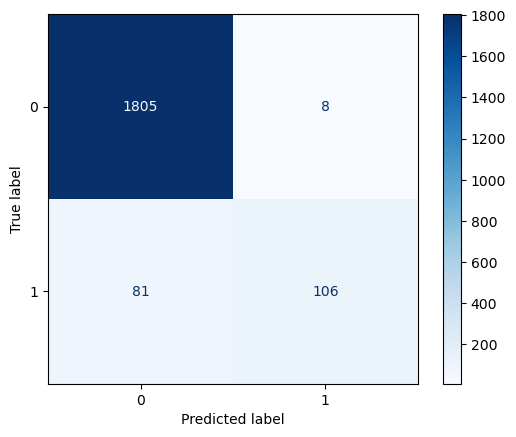

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(searchFit, 
                                      X_test_scaled, 
                                      y_test, 
                                      cmap = plt.cm.Blues);

To calculate specific metrics we can either compute them by hand with some basic algebra (e.g., accuracy = `(226+132)/(226+132+24+18)` = 0.895) or use various scikit-learn functions. For example, to calculate accuracy, we can use **accuracy_score**. Enter:

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, testPredictions)

0.9555

Alternatively, we cause use **classification_report** to calculate several of them at once:

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, testPredictions, target_names = ['Did Not Accept', 'Accepted']))

                precision    recall  f1-score   support

Did Not Accept       0.96      1.00      0.98      1813
      Accepted       0.93      0.57      0.70       187

      accuracy                           0.96      2000
     macro avg       0.94      0.78      0.84      2000
  weighted avg       0.95      0.96      0.95      2000



To evaluate the predictive performance of the KNN model using a different cutoff value, we first compute the probability of each case belonging to the target classes instead of its class membership. The scikit-learn **predict_proba** method can be used for this purpose. Enter:

In [23]:
testPredictionProbs = searchFit.predict_proba(X_test_scaled)
testPredictionProbs[:10,]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

The first column in the output above shows the probabilities of the cases belonging to Class 0 (Not accepted the loan offer), while the second column lists the probabilities of the cases belonging to Class 1 (accepted the loan offer). To determine class memberships using a cutoff value other than the default probability of 0.5 (for example, 0.25, in order to accurately classify more Class 1 cases), we compare the values in the second column to the new cutoff value. To achieve this, we use the NumPy **where** function to test which values in the second column (i.e., referenced via the slice `[:, 1]`, which indicates all rows in the second column [recall that in Python, since the first column is indexed by a 0, the second column is represented by 1]) are greater than the cutoff of `0.25`; values that are greater will be scored a `1` and values that are not will be scored a `0`, respectively. Enter:

In [24]:
np.size(testPredictionProbs)

4000

In [25]:
testPredsCustomCutoff=np.where(testPredictionProbs[:,1]>0.3,1,0)
testPredsCustomCutoff[:5] # show the first 5 class predictions

array([1, 0, 0, 1, 0])

Use confusion matrix from sklearn as above

In [26]:
confusion_matrix(y_test,testPredsCustomCutoff)

array([[1746,   67],
       [  30,  157]], dtype=int64)

In [27]:
print(classification_report(y_test, testPredsCustomCutoff, target_names = ['Did Not Accept', 'Accept']))

                precision    recall  f1-score   support

Did Not Accept       0.98      0.96      0.97      1813
        Accept       0.70      0.84      0.76       187

      accuracy                           0.95      2000
     macro avg       0.84      0.90      0.87      2000
  weighted avg       0.96      0.95      0.95      2000



In [28]:
accuracy_score(y_test, testPredsCustomCutoff)

0.9515

In [29]:
accuracy_score(y_test, testPredictions)

0.9555

When we drop the cutoff probability accuracy slightly dropped but recall (Sensitivity) increases. So, the decision maker is able to catch more of class 1. Which is good

In [30]:

from IPython.display import Markdown as md
md("Accuracy score is "+ str(accuracy_score(y_test,testPredictions)))


Accuracy score is 0.9555